# <h1> <center> **Customer Churn Prediction for Telecommunication Company: Enabling Targeted Retention Offers using Machine Learning** </center> <h1>

# Aim

* Analyze Churn Data: Identify factors affecting churn and assess multiple prediction models.
* Develop and Evaluate ML Models: Predict customer churn accurately and spot at-risk customers.
* Create and Implement Retention Strategies: Use insights to offer personalized retention strategies, boost loyalty, and support business growth.

# Installing and Importing Packages

In [1]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install imblearn

In [4]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install lifelines


Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install scikeras


Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split , cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report , confusion_matrix , f1_score, accuracy_score , roc_curve, roc_auc_score, auc


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import xgboost as xgb

from imblearn.over_sampling import SMOTE
import plotly.graph_objs as go
import plotly.offline as po
import lifelines
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier

# Import and Loading Data

In [9]:
data = pd.read_csv('dataSummer.csv')

# Data Exploration

In [10]:
data.head()

,Mobile_Number,MAINACTBAL,LASTVCEUSGDATE,LASTRECHRGDATE,FIRSTCALLDATE,DEVICETYPE,ISDEVICE3GENABLED,VASSUBSCRIBERFLAG,ISDEVICEDATAENABLED,AGEONNETWORK,...,SUMVCEREVCD1_30,SUMDATAREVCD1_30,SUMDATAUSGCD1_30,SUMVOICEUSGCD1_30,SUMDATAUSG4GCD1_15,SUMDATAUSG4GCD15_30,SMARTPHONEFLAG,MAINACTBAL1,CNTZEROBALCD_1,FIRSTREVGENEVTDATE
0,61159748,0.2630,04/16/2023 00:00:00,04/08/2023 00:00:00,04/14/2022 00:00:00,Smartphone,Y,N,Y,368.0,...,22.985625,0.00000,1.133457e+10,12878.0,275794501.0,1.105682e+10,Y,0.26304,0,04/14/2022 00:00:00
1,17488035,0.1901,04/15/2023 00:00:00,03/26/2023 00:00:00,06/13/2007 00:00:00,Smartphone,Y,N,Y,5786.0,...,26.570050,0.00000,0.000000e+00,652.0,0.0,0.000000e+00,Y,0.19011,0,06/14/2007 00:00:00
2,43749562,0.1243,04/01/2023 00:00:00,01/31/2023 00:00:00,02/16/2022 00:00:00,Voice Centric,N,N,N,425.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,0.12430,0,02/16/2022 00:00:00
3,87451055,1.6096,04/16/2023 00:00:00,04/11/2023 00:00:00,06/29/2013 00:00:00,Smartphone,Y,N,Y,3570.0,...,30.480910,0.52052,4.288550e+05,2721.0,426609.0,2.246000e+03,Y,1.60957,0,07/08/2013 00:00:00
4,64576359,5.1838,04/16/2023 00:00:00,04/10/2023 00:00:00,04/30/2012 00:00:00,Voice Centric,N,N,N,3999.0,...,95.027229,0.00000,0.000000e+00,3123.0,0.0,0.000000e+00,N,5.18376,0,05/05/2012 00:00:00


In [11]:
data.shape

(200000, 30)

In [12]:
list(data.columns.values)

['Mobile_Number',
 'MAINACTBAL',
 'LASTVCEUSGDATE',
 'LASTRECHRGDATE',
 'FIRSTCALLDATE',
 'DEVICETYPE',
 'ISDEVICE3GENABLED',
 'VASSUBSCRIBERFLAG',
 'ISDEVICEDATAENABLED',
 'AGEONNETWORK',
 'LASTREVGENEVTDATE',
 'SUBSRIBERLASTBALANCE',
 'last_app_used',
 'CUSTSEGMENT',
 'CNTCHURND1_30',
 'HANDSETCHANGESFLAGD1_30',
 'DEVICENETWORK',
 'DEVICEMODELC',
 'DEVICEDUALSIMFLAG',
 'ARPUD1_30',
 'SUMVCEREVCD1_30',
 'SUMDATAREVCD1_30',
 'SUMDATAUSGCD1_30',
 'SUMVOICEUSGCD1_30',
 'SUMDATAUSG4GCD1_15',
 'SUMDATAUSG4GCD15_30',
 'SMARTPHONEFLAG',
 'MAINACTBAL1',
 'CNTZEROBALCD_1',
 'FIRSTREVGENEVTDATE']

In [13]:
'''Concise Summary of the dataframe, as we have too many columns, we are using the verbose = True mode
The verbose=True parameter is used to display more information including the count of non-null values
and the data types of each column.'''

data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Mobile_Number            200000 non-null  int64  
 1   MAINACTBAL               200000 non-null  float64
 2   LASTVCEUSGDATE           199981 non-null  object 
 3   LASTRECHRGDATE           199852 non-null  object 
 4   FIRSTCALLDATE            199981 non-null  object 
 5   DEVICETYPE               200000 non-null  object 
 6   ISDEVICE3GENABLED        200000 non-null  object 
 7   VASSUBSCRIBERFLAG        200000 non-null  object 
 8   ISDEVICEDATAENABLED      200000 non-null  object 
 9   AGEONNETWORK             200000 non-null  float64
 10  LASTREVGENEVTDATE        200000 non-null  object 
 11  SUBSRIBERLASTBALANCE     200000 non-null  float64
 12  last_app_used            79836 non-null   object 
 13  CUSTSEGMENT              51917 non-null   object 
 14  CNTC

In [14]:
# Summary of numeric (int and float) data
data.describe()

,Mobile_Number,MAINACTBAL,AGEONNETWORK,SUBSRIBERLASTBALANCE,CNTCHURND1_30,HANDSETCHANGESFLAGD1_30,DEVICEDUALSIMFLAG,ARPUD1_30,SUMVCEREVCD1_30,SUMDATAREVCD1_30,SUMDATAUSGCD1_30,SUMVOICEUSGCD1_30,SUMDATAUSG4GCD1_15,SUMDATAUSG4GCD15_30,MAINACTBAL1,CNTZEROBALCD_1
count,2.000000e+05,200000.000000,200000.000000,200000.000000,89137.000000,35507.000000,121644.00000,200000.000000,154881.000000,151717.000000,1.551420e+05,155142.000000,1.497920e+05,1.520080e+05,200000.000000,200000.000000
mean,4.543535e+07,11.007088,1993.406405,11.007088,1.843398,1.364942,1.99649,176.082796,43.608401,2.491229,4.339707e+09,7641.116912,1.875771e+09,2.041547e+09,11.007088,0.003020
std,2.900110e+07,48.991782,1774.404666,48.991782,1.031201,0.789854,0.44538,297.788781,87.563824,6.910859,1.172820e+10,13910.996894,5.541364e+09,5.982678e+09,48.991782,0.054872
min,2.435000e+03,0.000000,101.000000,0.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,2.015619e+07,0.008600,531.000000,0.008600,1.000000,1.000000,2.00000,0.000000,0.000000,0.000000,0.000000e+00,435.000000,0.000000e+00,0.000000e+00,0.008610,0.000000
50%,4.208031e+07,0.141900,1369.000000,0.141900,2.000000,1.000000,2.00000,58.000000,9.217591,0.000000,1.327200e+04,2573.000000,0.000000e+00,0.000000e+00,0.141880,0.000000
75%,6.797840e+07,8.298200,3129.000000,8.298200,2.000000,2.000000,2.00000,216.000000,50.621675,0.455455,1.666354e+09,8977.750000,9.751026e+07,1.794456e+08,8.298160,0.000000
max,9.998810e+07,4909.386900,6638.000000,4909.386900,8.000000,30.000000,6.00000,9251.000000,5313.730175,225.059835,2.380753e+11,666309.000000,1.588541e+11,1.048388e+11,4909.386700,1.000000


Interpretation of descriptive statistics
* Range: Data spans a wide range, with values for AGEONNETWORK, SUBSRIBERLASTBALANCE, and other features varying significantly.
* Mean Values: Average MAINACTBAL is approximately 45.4 million, and average ARPUD1_30 is about 176.08, indicating typical balances and average revenue per user.
* Standard Deviation: High variability in MAINACTBAL and SUMVOICEUSGCD1_30, suggesting diverse customer behavior.
* Minimum and Maximum: AGEONNETWORK starts from 101 and goes up to 6638, with significant variations in other features like CNTCHURND1_30 and SUMDATAUSGCD1_30.
* Quartiles:
* 25% of the data shows lower balances and usage compared to the median.
* 50% (median) represents typical customer profiles with more moderate values.
* 75% indicates higher values, with outliers likely contributing to the maximum range.

In [15]:
# how many columns are of integer type
print('number of columns of integer type', data.select_dtypes(include='int64').shape[1])
# how many columns are of object type
print('number of columns of object type', data.select_dtypes(include='object').shape[1])
# how many columns are of float type
print('number of columns of float type', data.select_dtypes(include='float64').shape[1])

number of columns of integer type 2
number of columns of object type 14
number of columns of float type 14


In [16]:
# Summary of object data

data.describe(include="object")

,LASTVCEUSGDATE,LASTRECHRGDATE,FIRSTCALLDATE,DEVICETYPE,ISDEVICE3GENABLED,VASSUBSCRIBERFLAG,ISDEVICEDATAENABLED,LASTREVGENEVTDATE,last_app_used,CUSTSEGMENT,DEVICENETWORK,DEVICEMODELC,SMARTPHONEFLAG,FIRSTREVGENEVTDATE
count,199981,199852,199981,200000,200000,200000,200000,200000,79836,51917,121644,121644,200000,200000
unique,180,1472,6509,3,2,2,2,91,471,5,5,4969,2,6471
top,04/16/2023 00:00:00,04/16/2023 00:00:00,07/06/2020 00:00:00,Voice Centric,N,N,Y,04/16/2023 00:00:00,2023-04-17,Basic,4G,Itel Technology Limited IT2171/Value 110,N,12/31/2011 00:00:00
freq,159154,24185,279,99643,101035,196941,127802,101093,7035,30061,53857,2834,100717,307


In [17]:
# Identify duplicate data
# data[data.duplicated()==True]
data[data.duplicated()].sum()

Mobile_Number                0
MAINACTBAL                 0.0
LASTVCEUSGDATE               0
LASTRECHRGDATE               0
FIRSTCALLDATE                0
DEVICETYPE                   0
ISDEVICE3GENABLED            0
VASSUBSCRIBERFLAG            0
ISDEVICEDATAENABLED          0
AGEONNETWORK               0.0
LASTREVGENEVTDATE            0
SUBSRIBERLASTBALANCE       0.0
last_app_used                0
CUSTSEGMENT                  0
CNTCHURND1_30              0.0
HANDSETCHANGESFLAGD1_30    0.0
DEVICENETWORK                0
DEVICEMODELC                 0
DEVICEDUALSIMFLAG          0.0
ARPUD1_30                  0.0
SUMVCEREVCD1_30            0.0
SUMDATAREVCD1_30           0.0
SUMDATAUSGCD1_30           0.0
SUMVOICEUSGCD1_30          0.0
SUMDATAUSG4GCD1_15         0.0
SUMDATAUSG4GCD15_30        0.0
SMARTPHONEFLAG               0
MAINACTBAL1                0.0
CNTZEROBALCD_1               0
FIRSTREVGENEVTDATE           0
dtype: object

In [18]:
# Aggregation by grouping
# Frequency

data['DEVICETYPE'].value_counts()

DEVICETYPE
Voice Centric    99643
Smartphone       99023
Feature +         1334
Name: count, dtype: int64

# Data Cleaning

This part of the code is used to visually represent the percentage of missing values in each column. The point plot is chosen for this purpose because it allows for quick identification of columns with a higher percentage of missing data.

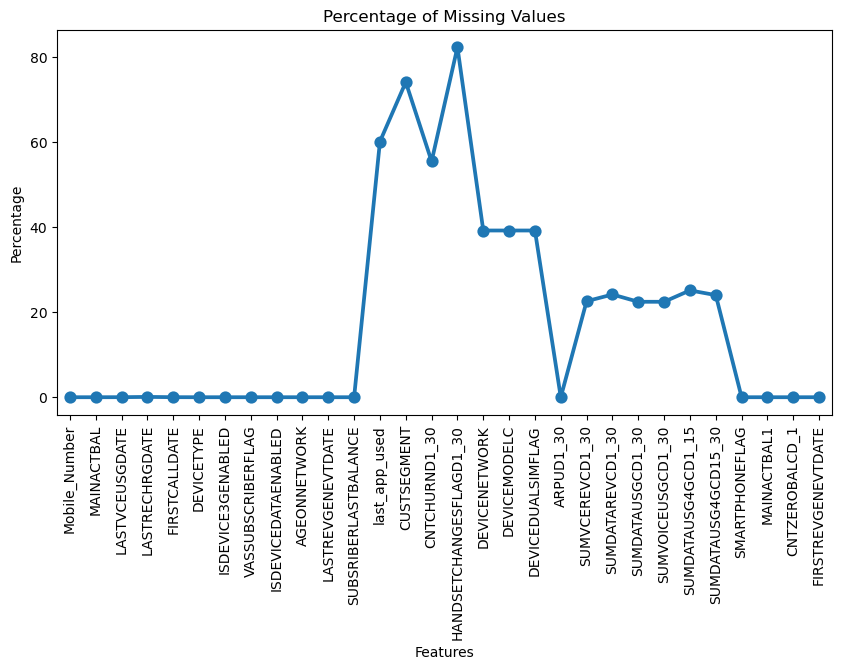

In [19]:
missing_values = pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index() #percentage of missing data
plt.figure(figsize=(10,5))
ax = sns.pointplot(x='index',y=0,data=missing_values)
plt.xticks(rotation =90,fontsize =10)
plt.title("Percentage of Missing Values")
plt.ylabel("Percentage")
plt.xlabel("Features")
plt.show()

In [20]:
'''Null values can affect the validity and quality of regression models. Hence, in order to prevent this,
null values are identified in the dataset.'''
data.isnull().sum()

Mobile_Number                   0
MAINACTBAL                      0
LASTVCEUSGDATE                 19
LASTRECHRGDATE                148
FIRSTCALLDATE                  19
DEVICETYPE                      0
ISDEVICE3GENABLED               0
VASSUBSCRIBERFLAG               0
ISDEVICEDATAENABLED             0
AGEONNETWORK                    0
LASTREVGENEVTDATE               0
SUBSRIBERLASTBALANCE            0
last_app_used              120164
CUSTSEGMENT                148083
CNTCHURND1_30              110863
HANDSETCHANGESFLAGD1_30    164493
DEVICENETWORK               78356
DEVICEMODELC                78356
DEVICEDUALSIMFLAG           78356
ARPUD1_30                       0
SUMVCEREVCD1_30             45119
SUMDATAREVCD1_30            48283
SUMDATAUSGCD1_30            44858
SUMVOICEUSGCD1_30           44858
SUMDATAUSG4GCD1_15          50208
SUMDATAUSG4GCD15_30         47992
SMARTPHONEFLAG                  0
MAINACTBAL1                     0
CNTZEROBALCD_1                  0
FIRSTREVGENEVT

In [21]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(data)

,Total,Percent
HANDSETCHANGESFLAGD1_30,164493,82.2465
CUSTSEGMENT,148083,74.0415
last_app_used,120164,60.0820
CNTCHURND1_30,110863,55.4315
DEVICEMODELC,78356,39.1780
DEVICENETWORK,78356,39.1780
DEVICEDUALSIMFLAG,78356,39.1780
SUMDATAUSG4GCD1_15,50208,25.1040
SUMDATAREVCD1_30,48283,24.1415
SUMDATAUSG4GCD15_30,47992,23.9960


In [22]:
data['HANDSETCHANGESFLAGD1_30'].dtype

dtype('float64')

## impute the missing data

In [ ]:
# percentage of missing data handling based on the domain knowledge
# Low Missing Data (<5%): Use mean, median, or mode (numerical); mode (categorical), forward and backward fill.
# Moderate Missing Data (5%-30%): Use median or mode (numerical); mode or most frequent value (categorical). 
# High Missing Data (>30%): Use advanced imputation (e.g., KNN) or drop the column if it’s not critical.

<Axes: >

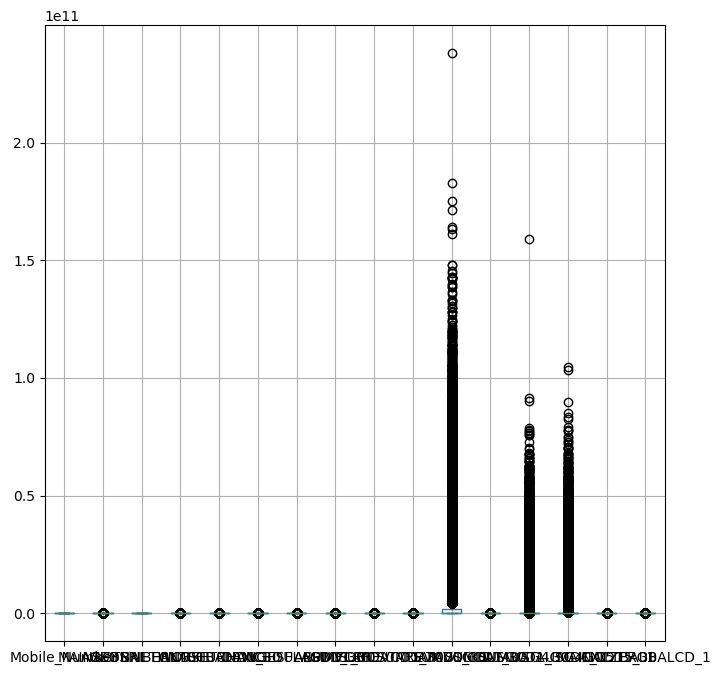

In [23]:

data.boxplot(figsize=(8,8))

In [24]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(data)

,Total,Percent
HANDSETCHANGESFLAGD1_30,164493,82.2465
CUSTSEGMENT,148083,74.0415
last_app_used,120164,60.0820
CNTCHURND1_30,110863,55.4315
DEVICEMODELC,78356,39.1780
DEVICENETWORK,78356,39.1780
DEVICEDUALSIMFLAG,78356,39.1780
SUMDATAUSG4GCD1_15,50208,25.1040
SUMDATAREVCD1_30,48283,24.1415
SUMDATAUSG4GCD15_30,47992,23.9960


In [26]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
data[['CNTCHURND1_30']] = imputer.fit_transform(data[['CNTCHURND1_30']])


In [28]:

from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le = LabelEncoder()

# Apply LabelEncoder to convert categorical columns to numerical
data['DEVICEMODELC'] = le.fit_transform(data['DEVICEMODELC'].astype(str))
data['DEVICENETWORK'] = le.fit_transform(data['DEVICENETWORK'].astype(str))
data['DEVICEDUALSIMFLAG'] = le.fit_transform(data['DEVICEDUALSIMFLAG'].astype(str))


In [29]:
from sklearn.impute import KNNImputer

# Initialize KNN Imputer
imputer = KNNImputer(n_neighbors=5)

# Apply imputer to numerical columns
data[['DEVICEMODELC', 'DEVICENETWORK', 'DEVICEDUALSIMFLAG']] = imputer.fit_transform(data[['DEVICEMODELC', 'DEVICENETWORK', 'DEVICEDUALSIMFLAG']])


In [30]:
# Drop columns with high missing data
columns_to_drop = ['HANDSETCHANGESFLAGD1_30', 'CUSTSEGMENT', 'last_app_used']
data.drop(columns=columns_to_drop,inplace=True)

In [31]:
print(data.columns)



Index(['Mobile_Number', 'MAINACTBAL', 'LASTVCEUSGDATE', 'LASTRECHRGDATE',
       'FIRSTCALLDATE', 'DEVICETYPE', 'ISDEVICE3GENABLED', 'VASSUBSCRIBERFLAG',
       'ISDEVICEDATAENABLED', 'AGEONNETWORK', 'LASTREVGENEVTDATE',
       'SUBSRIBERLASTBALANCE', 'CNTCHURND1_30', 'DEVICENETWORK',
       'DEVICEMODELC', 'DEVICEDUALSIMFLAG', 'ARPUD1_30', 'SUMVCEREVCD1_30',
       'SUMDATAREVCD1_30', 'SUMDATAUSGCD1_30', 'SUMVOICEUSGCD1_30',
       'SUMDATAUSG4GCD1_15', 'SUMDATAUSG4GCD15_30', 'SMARTPHONEFLAG',
       'MAINACTBAL1', 'CNTZEROBALCD_1', 'FIRSTREVGENEVTDATE'],
      dtype='object')


In [32]:
data.shape

(200000, 27)

In [33]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(data)

,Total,Percent
SUMDATAUSG4GCD1_15,50208,25.1040
SUMDATAREVCD1_30,48283,24.1415
SUMDATAUSG4GCD15_30,47992,23.9960
SUMVCEREVCD1_30,45119,22.5595
SUMVOICEUSGCD1_30,44858,22.4290
SUMDATAUSGCD1_30,44858,22.4290
LASTRECHRGDATE,148,0.0740
LASTVCEUSGDATE,19,0.0095
FIRSTCALLDATE,19,0.0095
Mobile_Number,0,0.0000


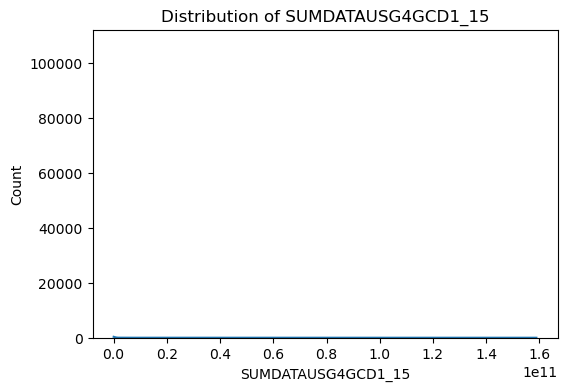

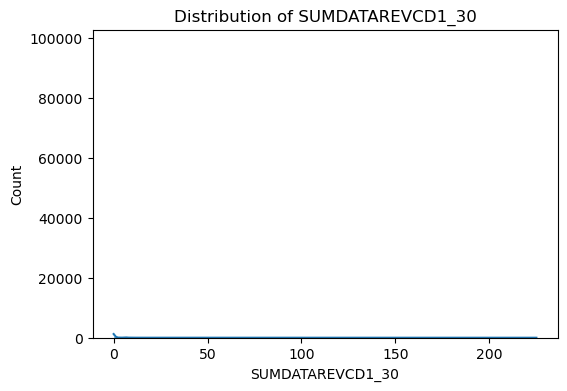

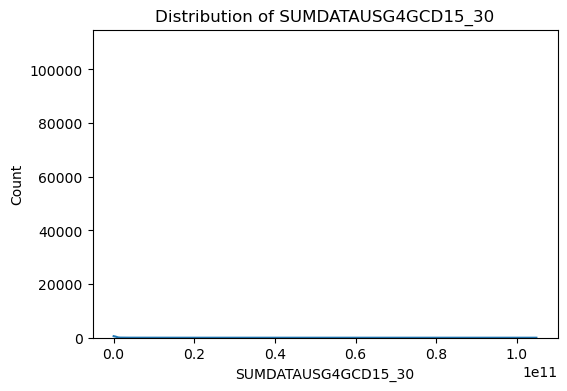

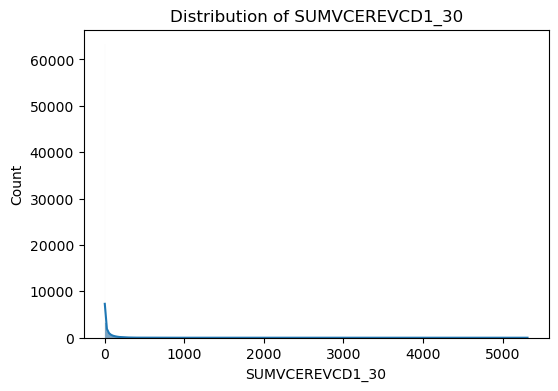

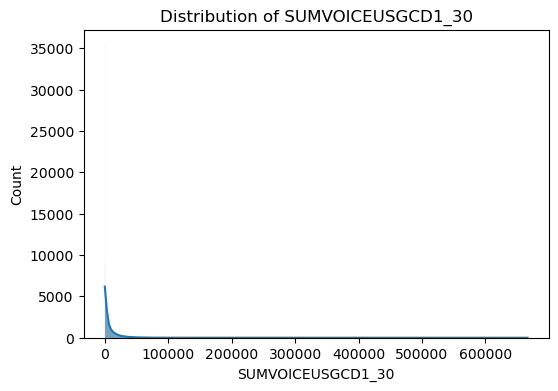

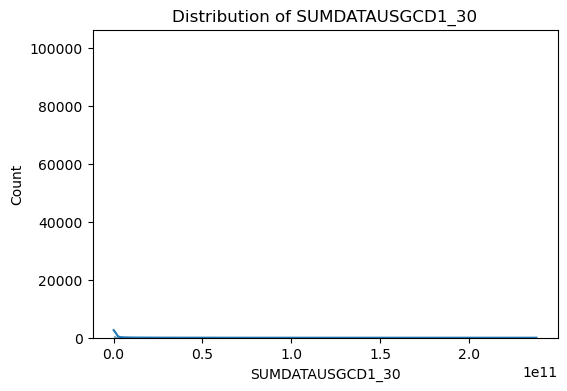

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms
columns_to_check = ['SUMDATAUSG4GCD1_15', 'SUMDATAREVCD1_30', 'SUMDATAUSG4GCD15_30', 
                    'SUMVCEREVCD1_30', 'SUMVOICEUSGCD1_30', 'SUMDATAUSGCD1_30']

for column in columns_to_check:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


In [35]:
skewness = data[columns_to_check].skew()
print(skewness)


SUMDATAUSG4GCD1_15     4.538779
SUMDATAREVCD1_30       5.345639
SUMDATAUSG4GCD15_30    4.371908
SUMVCEREVCD1_30        6.880368
SUMVOICEUSGCD1_30      5.758106
SUMDATAUSGCD1_30       4.185792
dtype: float64


* All skewness values are significantly positive, indicating that the distributions are right-skewed (i.e., they have a long tail on the right side).
* Median Imputation is generally more appropriate for right-skewed distributions because it is less sensitive to extreme values and better represents the central tendency in skewed data

In [36]:
# Applying Median Imputation
data['SUMDATAUSG4GCD1_15'].fillna(data['SUMDATAUSG4GCD1_15'].median(), inplace=True)
data['SUMDATAREVCD1_30'].fillna(data['SUMDATAREVCD1_30'].median(), inplace=True)
data['SUMDATAUSG4GCD15_30'].fillna(data['SUMDATAUSG4GCD15_30'].median(), inplace=True)
data['SUMVCEREVCD1_30'].fillna(data['SUMVCEREVCD1_30'].median(), inplace=True)
data['SUMVOICEUSGCD1_30'].fillna(data['SUMVOICEUSGCD1_30'].median(), inplace=True)
data['SUMDATAUSGCD1_30'].fillna(data['SUMDATAUSGCD1_30'].median(), inplace=True)


C:\Users\subha\AppData\Local\Temp\ipykernel_2196\2328756001.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\subha\AppData\Local\Temp\ipykernel_2196\2328756001.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [37]:
# Assuming you have already calculated the median for each column
medians = {
    'SUMDATAUSG4GCD1_15': data['SUMDATAUSG4GCD1_15'].median(),
    'SUMDATAREVCD1_30': data['SUMDATAREVCD1_30'].median(),
    'SUMDATAUSG4GCD15_30': data['SUMDATAUSG4GCD15_30'].median(),
    'SUMVCEREVCD1_30': data['SUMVCEREVCD1_30'].median(),
    'SUMVOICEUSGCD1_30': data['SUMVOICEUSGCD1_30'].median(),
    'SUMDATAUSGCD1_30': data['SUMDATAUSGCD1_30'].median()
}

# Impute missing values using the median values
for col, median in medians.items():
    data[col] = data[col].fillna(median)


In [38]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(data)

,Total,Percent
LASTRECHRGDATE,148,0.0740
LASTVCEUSGDATE,19,0.0095
FIRSTCALLDATE,19,0.0095
Mobile_Number,0,0.0000
DEVICEDUALSIMFLAG,0,0.0000
CNTZEROBALCD_1,0,0.0000
MAINACTBAL1,0,0.0000
SMARTPHONEFLAG,0,0.0000
SUMDATAUSG4GCD15_30,0,0.0000
SUMDATAUSG4GCD1_15,0,0.0000


In [39]:
# Convert object columns to datetime
data['LASTRECHRGDATE'] = pd.to_datetime(data['LASTRECHRGDATE'], errors='coerce')
data['LASTVCEUSGDATE'] = pd.to_datetime(data['LASTVCEUSGDATE'], errors='coerce')
data['FIRSTCALLDATE'] = pd.to_datetime(data['FIRSTCALLDATE'], errors='coerce')


In [40]:
# Forward fill the missing values
data['LASTRECHRGDATE'] = data['LASTRECHRGDATE'].ffill()  # Use ffill() instead of fillna(method='ffill')
data['LASTVCEUSGDATE'] = data['LASTVCEUSGDATE'].ffill()
data['FIRSTCALLDATE'] = data['FIRSTCALLDATE'].ffill()




In [41]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(data)

,Total,Percent
Mobile_Number,0,0.0
DEVICEMODELC,0,0.0
CNTZEROBALCD_1,0,0.0
MAINACTBAL1,0,0.0
SMARTPHONEFLAG,0,0.0
SUMDATAUSG4GCD15_30,0,0.0
SUMDATAUSG4GCD1_15,0,0.0
SUMVOICEUSGCD1_30,0,0.0
SUMDATAUSGCD1_30,0,0.0
SUMDATAREVCD1_30,0,0.0


## Data Transformation

In [42]:
# Convert the datetime columns to numeric UNIX timestamp (seconds since 1970-01-01)
data['LASTRECHRGDATE'] = data['LASTRECHRGDATE'].astype('int64') // 10**9
data['LASTVCEUSGDATE'] = data['LASTVCEUSGDATE'].astype('int64') // 10**9
data['FIRSTCALLDATE'] = data['FIRSTCALLDATE'].astype('int64') // 10**9


In [43]:
data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Mobile_Number         200000 non-null  int64  
 1   MAINACTBAL            200000 non-null  float64
 2   LASTVCEUSGDATE        200000 non-null  int64  
 3   LASTRECHRGDATE        200000 non-null  int64  
 4   FIRSTCALLDATE         200000 non-null  int64  
 5   DEVICETYPE            200000 non-null  object 
 6   ISDEVICE3GENABLED     200000 non-null  object 
 7   VASSUBSCRIBERFLAG     200000 non-null  object 
 8   ISDEVICEDATAENABLED   200000 non-null  object 
 9   AGEONNETWORK          200000 non-null  float64
 10  LASTREVGENEVTDATE     200000 non-null  object 
 11  SUBSRIBERLASTBALANCE  200000 non-null  float64
 12  CNTCHURND1_30         200000 non-null  float64
 13  DEVICENETWORK         200000 non-null  float64
 14  DEVICEMODELC          200000 non-null  float64
 15  

In [44]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Categorical columns
binary_columns = ['ISDEVICE3GENABLED', 'VASSUBSCRIBERFLAG', 'ISDEVICEDATAENABLED', 'SMARTPHONEFLAG']
multi_cat_columns = ['DEVICETYPE']

# Label encode binary columns
for col in binary_columns:
    data[col] = LabelEncoder().fit_transform(data[col])

# One-hot encode columns with multiple categories
onehot_encoder = OneHotEncoder(drop='first')  # Drop the first to avoid collinearity
encoded_data = onehot_encoder.fit_transform(data[multi_cat_columns])

# Convert the encoded columns to a DataFrame and merge back with the original dataset
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=onehot_encoder.get_feature_names_out(multi_cat_columns))
data = pd.concat([data.drop(columns=multi_cat_columns), encoded_df], axis=1)

# Now you can split the data into x_train, x_test, y_train, y_test, and fit your Logistic Regression model


In [45]:
import pandas as pd

# List of date columns to convert
date_columns = ['LASTREVGENEVTDATE', 'FIRSTREVGENEVTDATE']

# Convert the date columns to datetime format
for col in date_columns:
    data[col] = pd.to_datetime(data[col], format='%m/%d/%Y %H:%M:%S')

# Option 1: Convert the date to a numeric format (e.g., Unix timestamp)
for col in date_columns:
    data[col + '_timestamp'] = data[col].apply(lambda x: x.timestamp())
data = data.drop(columns=date_columns)

In [46]:
data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 28 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Mobile_Number                 200000 non-null  int64  
 1   MAINACTBAL                    200000 non-null  float64
 2   LASTVCEUSGDATE                200000 non-null  int64  
 3   LASTRECHRGDATE                200000 non-null  int64  
 4   FIRSTCALLDATE                 200000 non-null  int64  
 5   ISDEVICE3GENABLED             200000 non-null  int32  
 6   VASSUBSCRIBERFLAG             200000 non-null  int32  
 7   ISDEVICEDATAENABLED           200000 non-null  int32  
 8   AGEONNETWORK                  200000 non-null  float64
 9   SUBSRIBERLASTBALANCE          200000 non-null  float64
 10  CNTCHURND1_30                 200000 non-null  float64
 11  DEVICENETWORK                 200000 non-null  float64
 12  DEVICEMODELC                  200000 non-nul

## Data Visualization


In [47]:
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

print("Numeric Columns:", numeric_columns)
print("Categorical Columns:", categorical_columns)

Numeric Columns: Index(['Mobile_Number', 'MAINACTBAL', 'LASTVCEUSGDATE', 'LASTRECHRGDATE',
       'FIRSTCALLDATE', 'AGEONNETWORK', 'SUBSRIBERLASTBALANCE',
       'CNTCHURND1_30', 'DEVICENETWORK', 'DEVICEMODELC', 'DEVICEDUALSIMFLAG',
       'ARPUD1_30', 'SUMVCEREVCD1_30', 'SUMDATAREVCD1_30', 'SUMDATAUSGCD1_30',
       'SUMVOICEUSGCD1_30', 'SUMDATAUSG4GCD1_15', 'SUMDATAUSG4GCD15_30',
       'MAINACTBAL1', 'CNTZEROBALCD_1', 'DEVICETYPE_Smartphone',
       'DEVICETYPE_Voice Centric', 'LASTREVGENEVTDATE_timestamp',
       'FIRSTREVGENEVTDATE_timestamp'],
      dtype='object')
Categorical Columns: Index([], dtype='object')


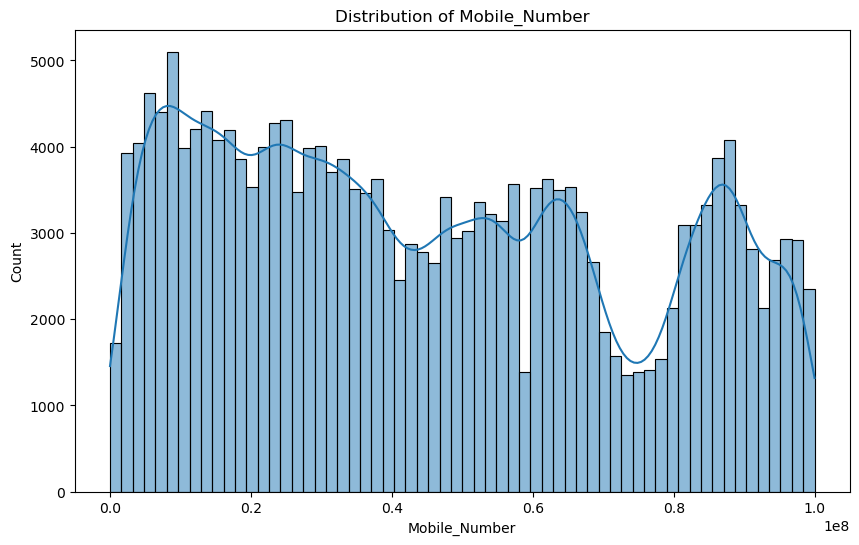

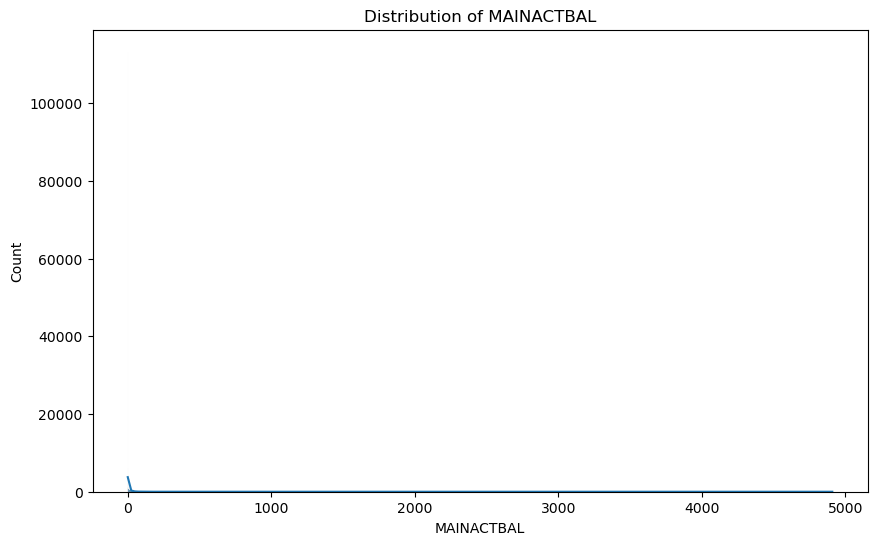

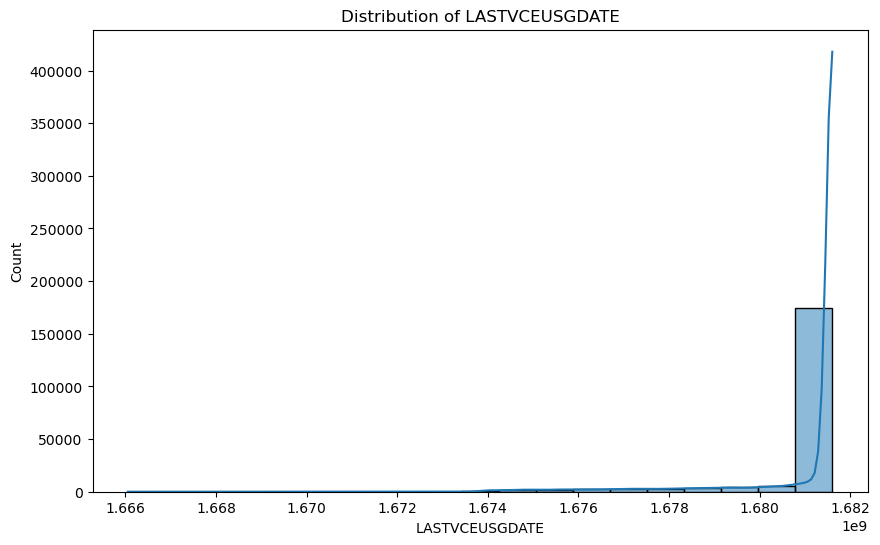

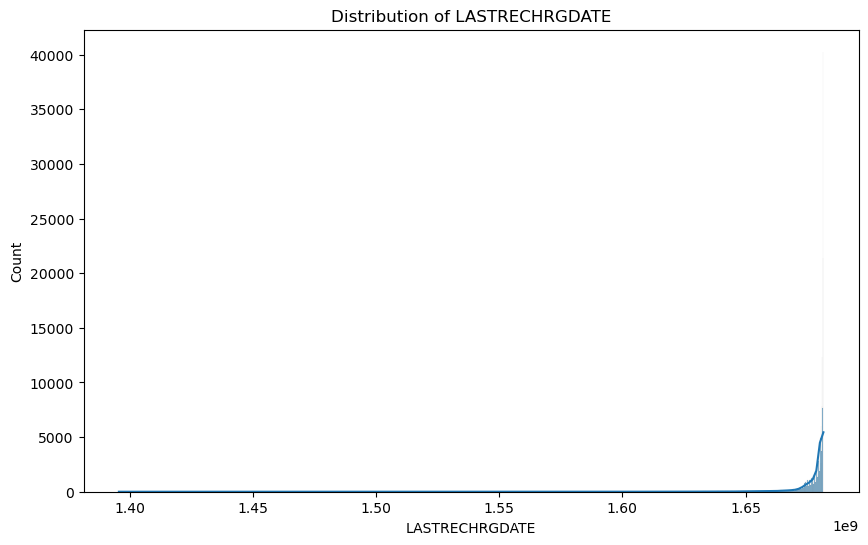

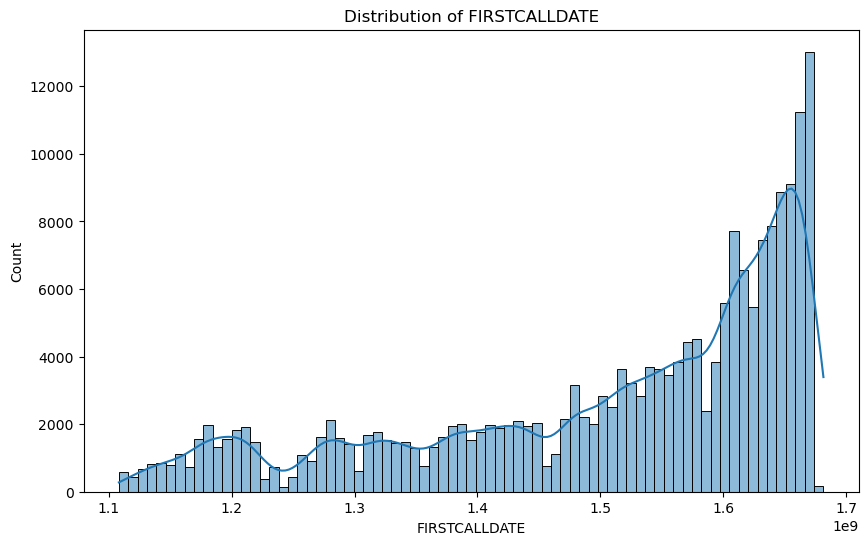

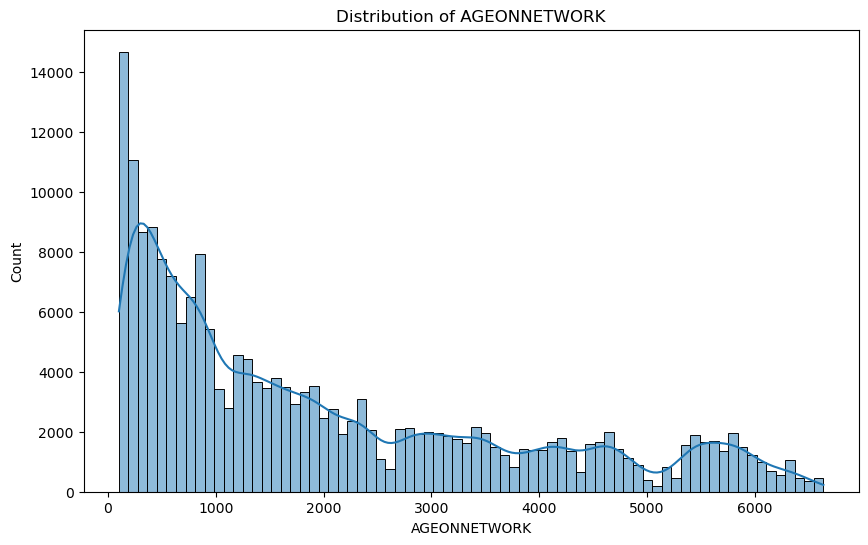

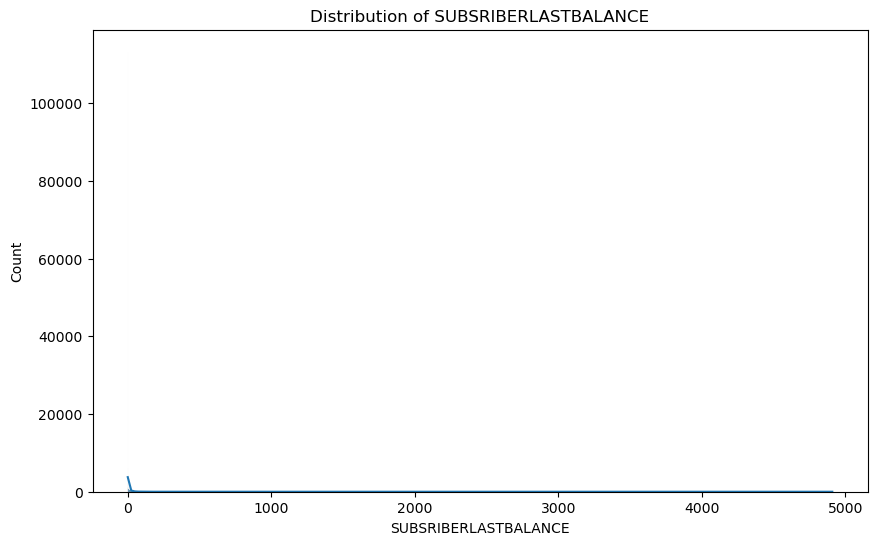

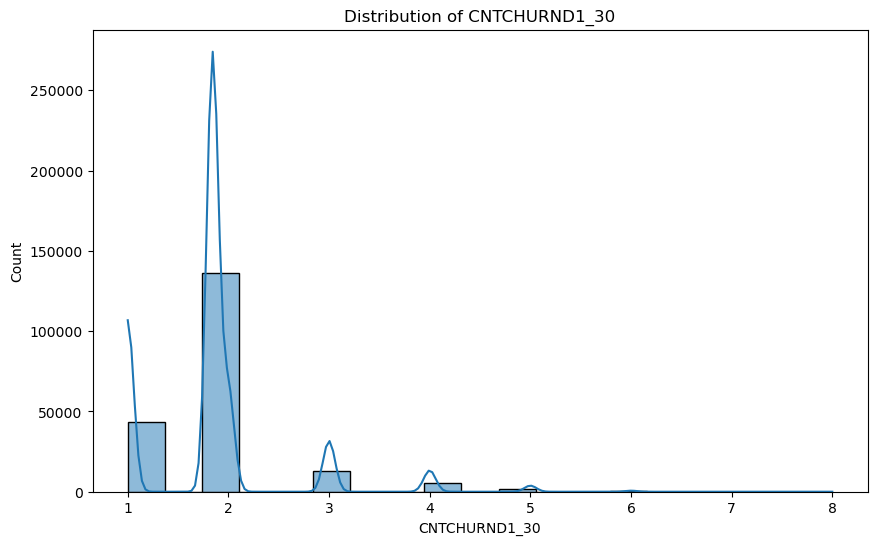

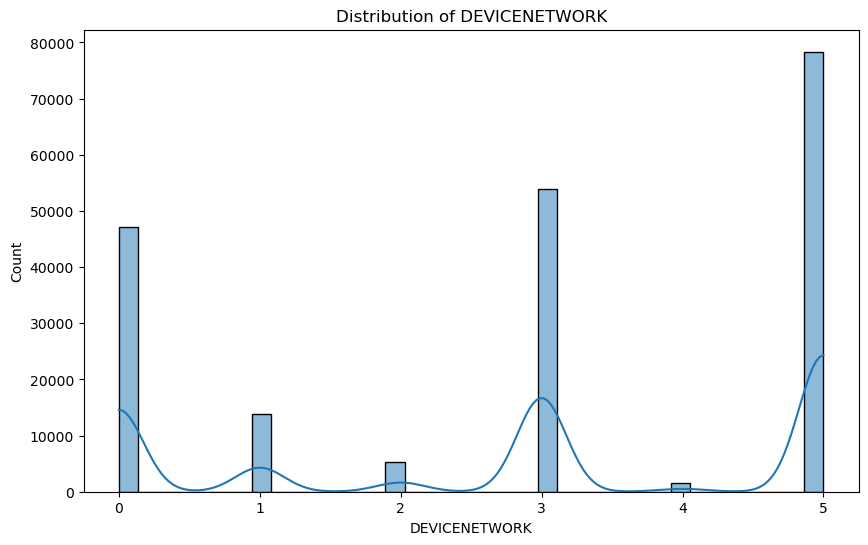

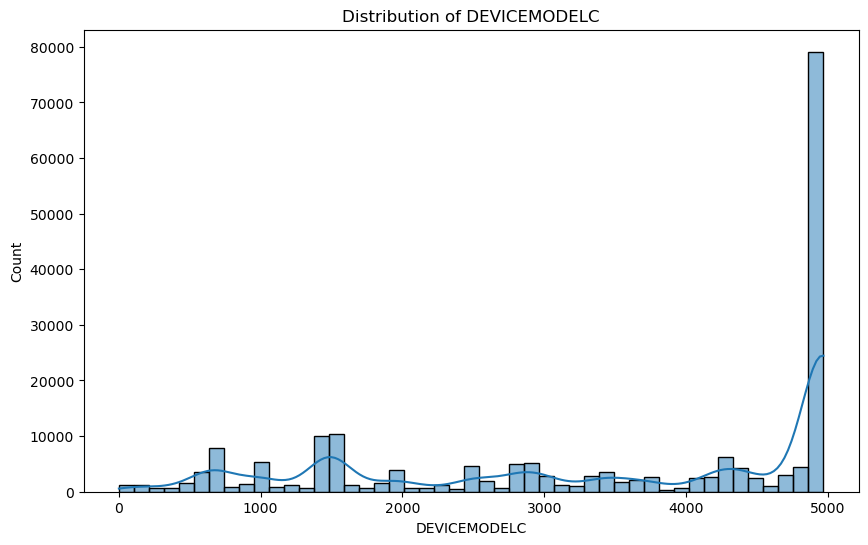

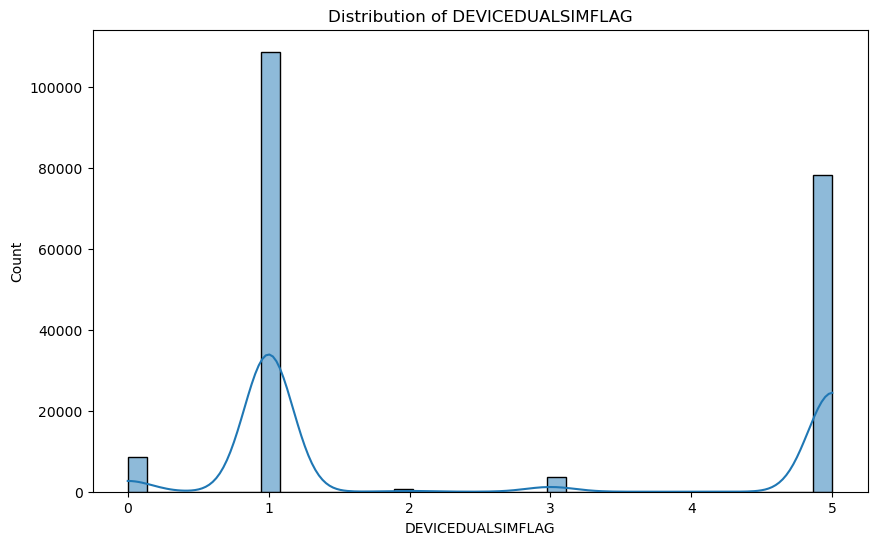

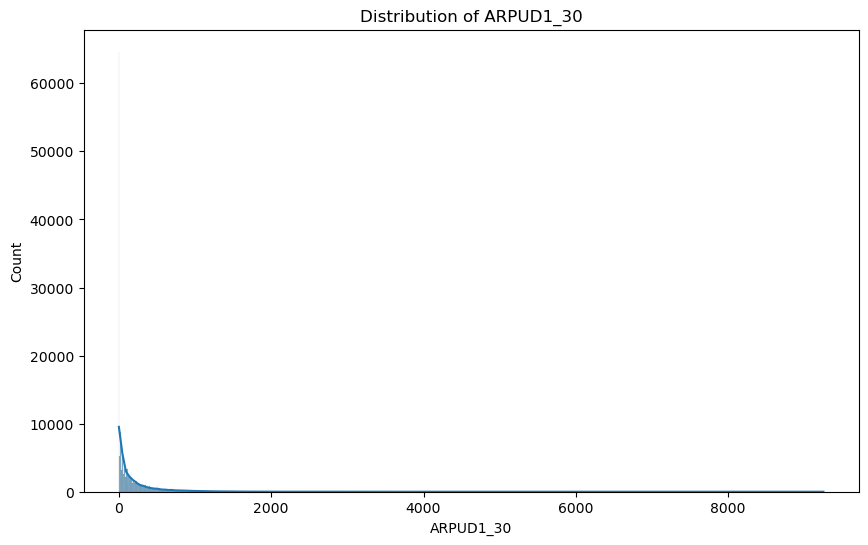

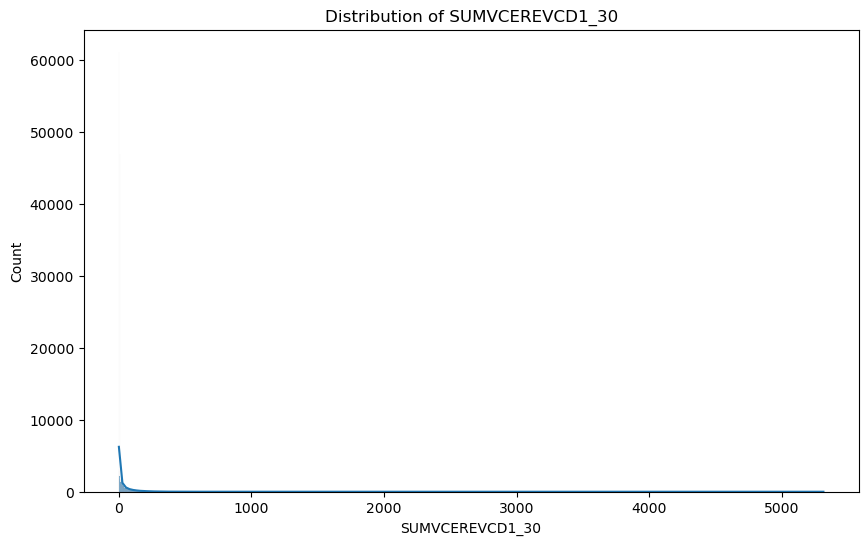

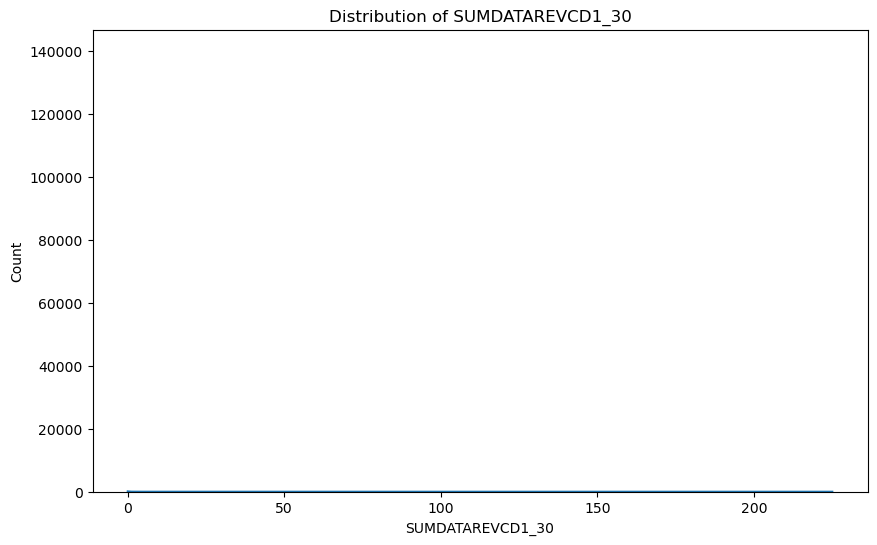

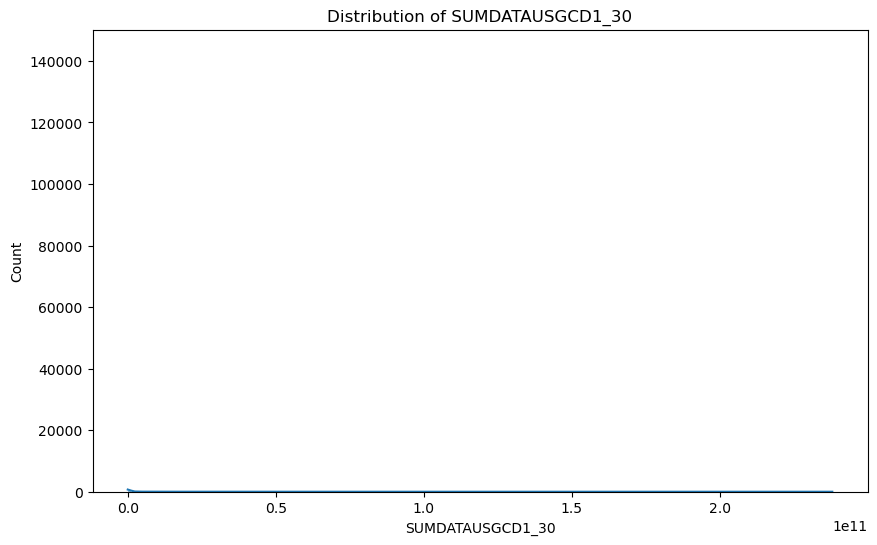

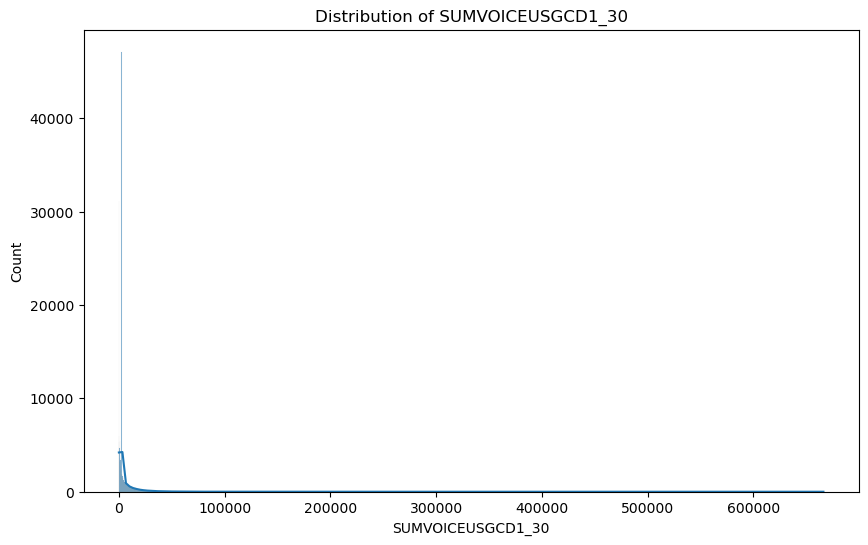

In [ ]:
def plot_histogram(data, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()



# Apply to numerical  columns
for col in numeric_columns:
    plot_histogram(data, col)




In [ ]:
## EDA

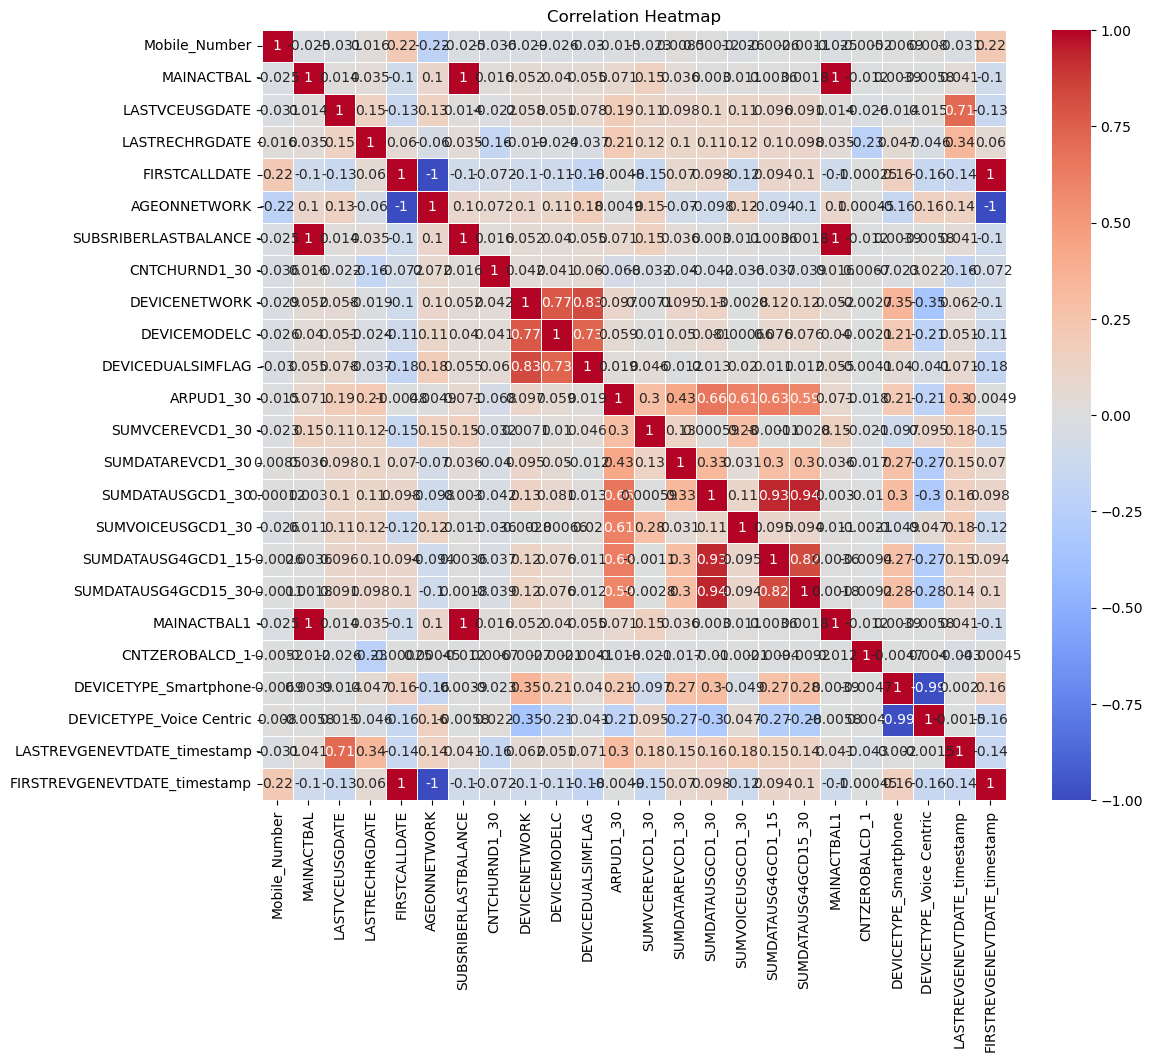

In [50]:
plt.figure(figsize=(12, 10))
correlation_matrix = data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

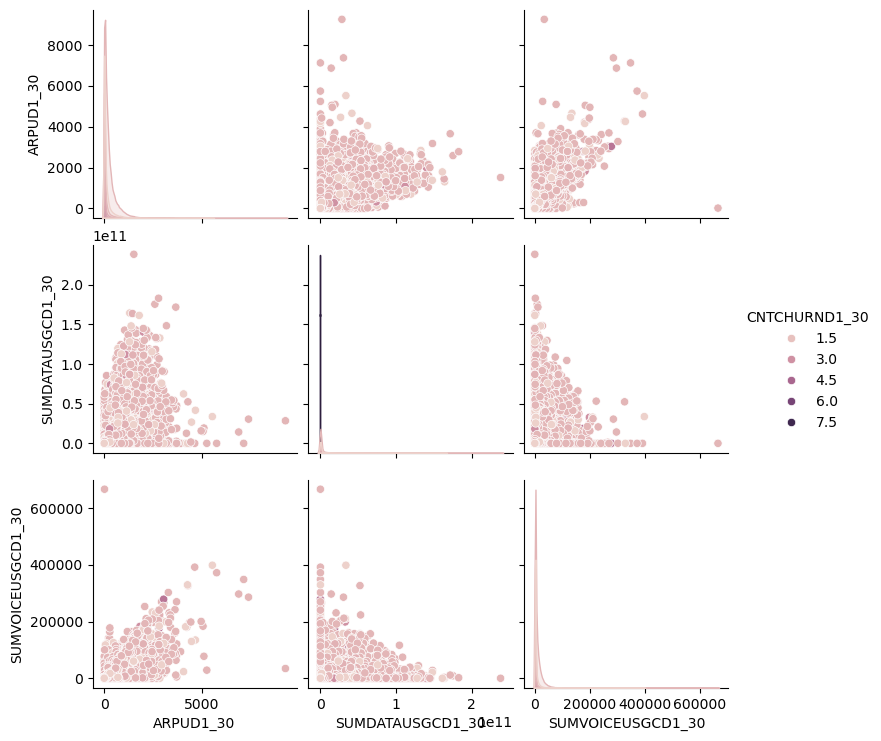

In [52]:
#Multivariate analysis
sns.pairplot(data[['ARPUD1_30', 'SUMDATAUSGCD1_30', 'SUMVOICEUSGCD1_30', 'CNTCHURND1_30']], hue='CNTCHURND1_30')
plt.show()

# Model building using ML algorithms

## Data preparation

In [53]:
test=data.drop(['CNTCHURND1_30'],axis=1)
x_train=test
y_train=data['CNTCHURND1_30']

In [54]:
print(y_train.unique())


[1.84339836 2.         3.         1.         4.         5.
 6.         8.         7.        ]


In [55]:
print(y_train.head())
print(y_train.dtypes)
print(y_train.unique())


0    1.843398
1    1.843398
2    2.000000
3    3.000000
4    1.843398
Name: CNTCHURND1_30, dtype: float64
float64
[1.84339836 2.         3.         1.         4.         5.
 6.         8.         7.        ]


In [56]:
# Assuming y_train should be binary or categorical
y_train = pd.cut(y_train, bins=2, labels=[0, 1])  # For binary classification

# For multiclass, you might need to map your categories to integer labels
# e.g., y_train = y_train.astype('category').cat.codes


In [57]:
print(y_train.isna().sum())
y_train = y_train.dropna()  # or fill with appropriate values


0


In [58]:
print(len(x_train), len(y_train))


200000 200000


In [59]:
# Select ML algorithms

In [60]:
## Logistic Regression

In [100]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter=1000)
LR.fit(x_train, y_train)


LogisticRegression(max_iter=1000)

In [101]:
LR=LogisticRegression()
LR.fit(x_train,y_train)

C:\Users\subha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [102]:
pred=LR.predict(test)

In [103]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Model evaluation

In [104]:
accuracy_score(y_train,pred)

0.990445

In [105]:
confusion_matrix(y_train,pred)

array([[198084,     82],
       [  1829,      5]], dtype=int64)

In [106]:
from sklearn.metrics import precision_score
precision_score(y_train,pred)

0.05747126436781609

In [107]:
from sklearn.metrics import recall_score
recall_score(y_train,pred)

0.0027262813522355507

In [109]:
from sklearn.metrics import f1_score

f1 = f1_score(y_train, pred)
print("F1 Score:", f1)

F1 Score: 0.0052056220718375845


# Random Forest

In [110]:
rf_model = RandomForestClassifier()

In [111]:
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [112]:
rf_prediction = rf_model.predict(test)

In [113]:
rf_prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [114]:
accuracy_score(y_train,rf_prediction)

0.999965

In [115]:
confusion_matrix(y_train,rf_prediction)

array([[198166,      0],
       [     7,   1827]], dtype=int64)

In [116]:
from sklearn.metrics import precision_score
precision_score(y_train,rf_prediction)

1.0

In [117]:
from sklearn.metrics import recall_score
recall_score(y_train,rf_prediction)

0.9961832061068703

In [118]:
from sklearn.metrics import f1_score

f1 = f1_score(y_train, rf_prediction)
print("F1 Score:", f1)

F1 Score: 0.9980879541108987


In [80]:
# SVM

In [81]:
svc_model  = SVC()

In [82]:
svc_model.fit(x_train,y_train)

SVC()

In [86]:
svc_prediction = svc_model.predict(test)

In [87]:
svc_prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [90]:
accuracy_score(y_train,svc_prediction)

0.99083

In [99]:
from sklearn.metrics import f1_score

f1 = f1_score(y_train, svc_prediction)
print("F1 Score:", f1)


F1 Score: 0.0


In [ ]:
## Model comparison

In [ ]:
* Cross-validation is a technique depicted in the image through a Python code snippet, used to evaluate the effectiveness of machine learning models by dividing data into folds and ensuring each fold is used as a testing set and a training set. Here, a dictionary is initialized to store the mean cross-validation scores of various models, and Stratified K-Fold is configured for 5 splits with data shuffling to maintain class proportionality. The snippet includes different models like Logistic Regression and XGBoost, and it iterates through each model, calculating the F1 score to assess model performance. The results are then averaged and stored, helping in robustly comparing model effectiveness and avoiding overfitting.

In [120]:
from sklearn.model_selection import StratifiedKFold
cv_scores_dict ={}

kfold_cv = StratifiedKFold(n_splits = 5,shuffle=True , random_state = 42)

models = [LR,rf_model,svc_model]
model_names  = ['Logistic Regression','Random Forest','SVM']
for i , j in zip (models,model_names):
  cv_scores = cross_val_score(i, x_train, y_train, cv=kfold_cv, scoring='f1', error_score="raise")
  mean_score = cv_scores.mean()
  cv_scores_dict[j] =  mean_score

C:\Users\subha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\subha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\subha\anaconda3\Lib\site-packages

In [121]:
pd.DataFrame(cv_scores_dict.items(),columns=['ML Models','Cross Validation Average F1 Score'])

,ML Models,Cross Validation Average F1 Score
0,Logistic Regression,0.001072
1,Random Forest,0.001087
2,SVM,0.000000


**CONCLUSION:**

In our customer churn prediction project within the telecommunications sector, we utilized a diverse set of advanced machine learning algorithms to develop a predictive model. We used ML models such as Logistic Regression, Random Forest, Sector Vector Machines (SVM). Each model was carefully selected to maximize predictive accuracy and performance. Specifically, the Random Forest model emerged as top performers, consistently demonstrating high predictive accuracy and achieving strong F1 scores.
